<a href="https://colab.research.google.com/github/salviyas/Neural-Network/blob/main/Neural_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

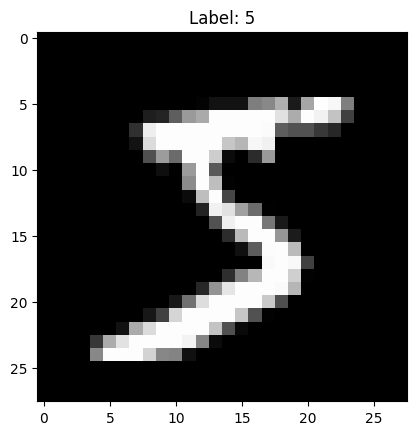

In [5]:
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title('Label: {}'.format(train_labels[0]))
plt.show()



In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
history=model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.8894 - loss: 0.3533 - val_accuracy: 0.9852 - val_loss: 0.0494
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9824 - loss: 0.0564 - val_accuracy: 0.9845 - val_loss: 0.0547
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9885 - loss: 0.0365 - val_accuracy: 0.9880 - val_loss: 0.0429
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9902 - val_loss: 0.0405
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9900 - val_loss: 0.0361


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9881 - loss: 0.0380
Test accuracy: 0.9900000095367432


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


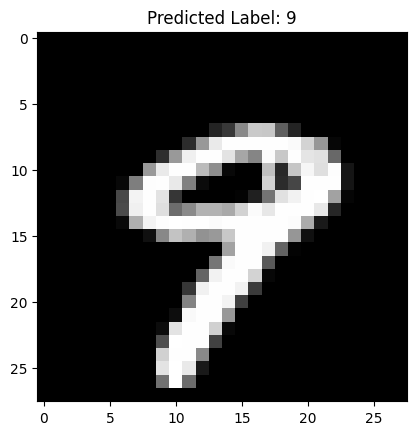

In [15]:
preictions=model.predict(test_images)

predicted_labels = np.argmax(preictions[9])
plt.imshow(test_images[9].reshape(28, 28), cmap='gray')
plt.title('Predicted Label: {}'.format(predicted_labels))
plt.show()